In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [5]:
# Load dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

X = lfw_people.images  
y = lfw_people.target 
target_names = lfw_people.target_names
print("Shape of dataset:", X.shape)  
print("Number of classes:", len(target_names))


Shape of dataset: (1288, 50, 37)
Number of classes: 7


In [6]:
# Normalize
X = X.astype("float32") / 255.0

# Reshape to (n_samples, height, width, 1)
X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)

print("Final X shape:", X.shape)  # should be (1288, 50, 37, 1)

# Encode labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_cat = to_categorical(y_encoded)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_cat, test_size=0.25, random_state=42
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Final X shape: (1288, 50, 37, 1)
Train shape: (966, 50, 37, 1) Test shape: (322, 50, 37, 1)


In [7]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu', input_shape=(50, 37, 1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(target_names), activation="softmax"))


c:\Users\manas\Desktop\dl\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile( optimizer="adam",loss="categorical_crossentropy", metrics=["accuracy"])


In [21]:
history = model.fit(X_train, y_train,validation_data=(X_test, y_test),epochs=50,batch_size=32,verbose=1)

Epoch 1/50


31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.3975 - loss: 1.7113 - val_accuracy: 0.4534 - val_loss: 1.6111
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.3975 - loss: 1.7094 - val_accuracy: 0.4534 - val_loss: 1.6065
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.3975 - loss: 1.7116 - val_accuracy: 0.4534 - val_loss: 1.6096
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.3975 - loss: 1.7208 - val_accuracy: 0.4534 - val_loss: 1.6134
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.3975 - loss: 1.7139 - val_accuracy: 0.4534 - val_loss: 1.6110
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.3975 - loss: 1.7110 - val_accuracy: 0.4534 - val_loss: 1.6090
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.3975 - loss: 1.7097 - val_accuracy: 0.4534 - val_loss: 1.6071
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.3975 - loss: 1.7098 - val_accuracy: 0.4534 - val_loss: 1.

In [22]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", round(test_acc*100, 2), "%")

Test Accuracy: 45.34 %


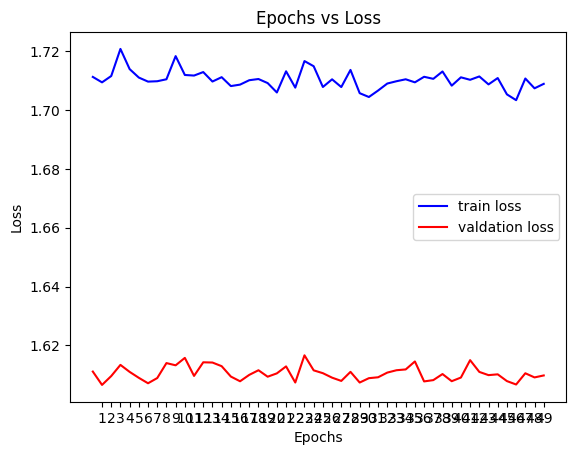

In [23]:
plt.plot(history.history['loss'],label='train loss',color='blue')
plt.plot(history.history['val_loss'],label='valdation loss',color='red')
plt.xticks(np.arange(1,50))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Epochs vs Loss")
plt.legend()
plt.show()

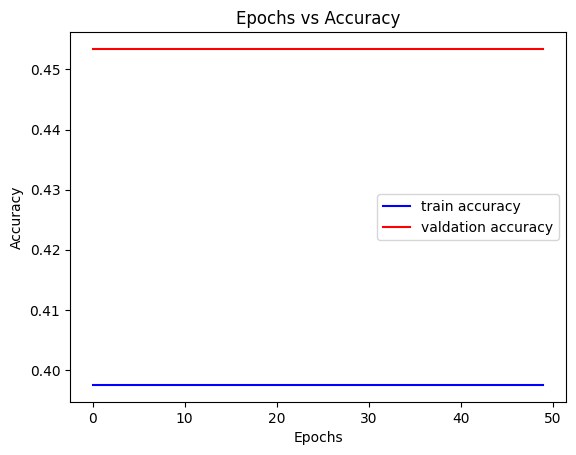

In [24]:
plt.plot(history.history['accuracy'],label='train accuracy',color='blue')
plt.plot(history.history['val_accuracy'],label='valdation accuracy',color='red')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Epochs vs Accuracy")
plt.legend()
plt.show()

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


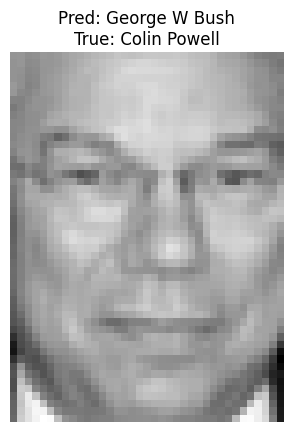

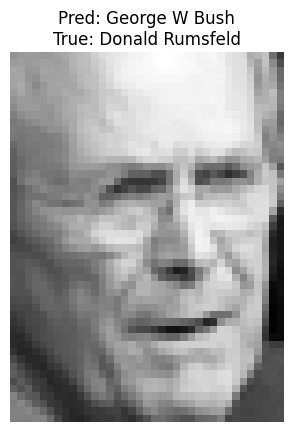

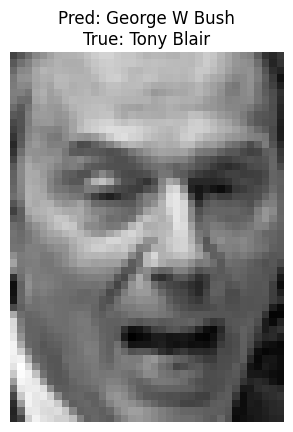

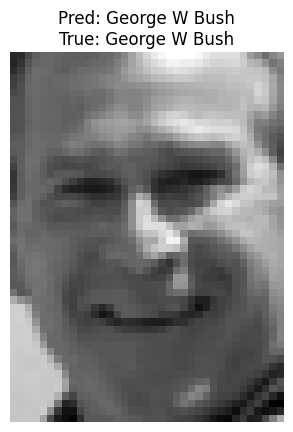

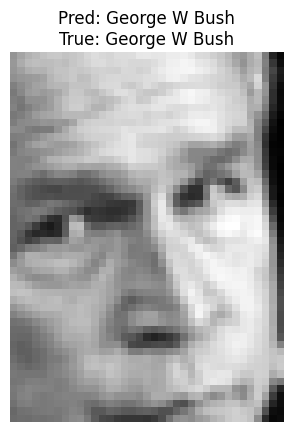

In [26]:
import random

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Show 5 random predictions
for i in range(5):
    idx = random.randint(0, len(X_test)-1)
    
    sample = X_test[idx].reshape(50, 37)
    predicted_class = target_names[y_pred_classes[idx]]
    actual_class = target_names[y_true_classes[idx]]
    
    plt.imshow(sample, cmap="gray")
    plt.title(f"Pred: {predicted_class}\nTrue: {actual_class}")
    plt.axis("off")
    plt.show()
    
